## Laboratorium: Odchylenie standardowe, korelacja i energia obrazów

## 1. Wprowadzenie teoretyczne

### 1.1. Odchylenie standardowe (STD)

Odchylenie standardowe opisuje poziom zmienności wartości jasności w obrazie.
Wysokie wartości wskazują na obecność licznych struktur o dużej częstotliwości — krawędzi, tekstur oraz lokalnych szczegółów.
Niskie wartości są charakterystyczne dla obrazów jednorodnych i wygładzonych.

Rozmycie Gaussowskie redukuje komponenty wysokoczęstotliwościowe, co prowadzi do obniżenia odchylenia standardowego.

Odchylenie standardowe obrazu mierzy zmienność jasności pikseli. Jest definiowane jako:

$$
\sigma =
\sqrt{
\frac{1}{MN}
\sum_{x=1}^{M}
\sum_{y=1}^{N}
\left( I(x,y) - \mu \right)^2
}
$$
wysokie σ → obraz o dużej liczbie szczegółów, dużym kontraście

niskie σ → obraz gładki, jednolity

### 1.2. Korelacja pikseli

Korelacja pomiędzy obrazem oryginalnym a przetworzonym odzwierciedla stopień zachowania struktury globalnej.

Wartości bliskie jedności oznaczają wysokie podobieństwo strukturalne.
Niższe wartości wskazują na istotne zmiany w zawartości obrazu.

W przypadku rozmycia Gaussowskiego korelacja ulega obniżeniu, jednak pozostaje relatywnie wysoka, ponieważ struktura globalna zostaje zachowana, natomiast szczegóły lokalne — zredukowane.

Korelacja opisuje podobieństwo między dwoma obrazami.
Najczęściej stosuje się korelację Pearsona:

$$
r =
\frac{
\sum (A - \bar{A})(B - \bar{B})
}{
\sqrt{
\sum (A - \bar{A})^{2}
\;\;
\sum (B - \bar{B})^{2}
}
}
$$

Wartości:
r = 1 → obrazy identyczne
r = 0 → brak zależności
r < 0 → odwrotna korelacja

#### 1.2.1 Korelacja Pearsona

Korelacja Pearsona jest miarą liniowej zależności między dwiema zmiennymi.
Określa, jak silnie i w jakim kierunku dwie zmienne zmieniają się względem siebie.
$$
r = 
\frac{
\sum_{i=1}^{N} (X_i - \bar{X})(Y_i - \bar{Y})
}{
\sqrt{
\left( \sum_{i=1}^{N} (X_i - \bar{X})^2 \right)
\left( \sum_{i=1}^{N} (Y_i - \bar{Y})^2 \right)
}}
$$

gdzie:

- \(X_i, Y_i\) — obserwacje (pary wartości dwóch zmiennych),
- \(\bar{X}, \bar{Y}\) — wartości średnie odpowiednio dla zmiennych \(X\) i \(Y\).

### Zakres wartości

$$
-1 \le r \le 1
 $$
Korelacja Pearsona odpowiada na pytanie:

Czy zmiana jednego piksela idzie w parze ze zmianą drugiego?


### Interpretacja

| Wartość \( r \) | Znaczenie                                      |
|-----------------|------------------------------------------------|
| \( r = 1 \)     | pełna korelacja dodatnia (idealna zależność liniowa) |
| \( r = -1 \)    | pełna korelacja ujemna (idealna zależność liniowa odwrotna) |
| \( r = 0 \)     | brak zależności liniowej                        |





### 1.3. Energia obrazu

Energia obrazu wyraża sumaryczną intensywność zmian pikselowych i jest powiązana z występowaniem detali o dużej częstotliwości.
Energia opisuje intensywność sygnału obrazu i jest definiowana jako:

$$
E = \sum_{x=1}^{M} \sum_{y=1}^{N} I(x, y)^{2}
$$

Interpretacja:

- wysoka energia → dużo szczegółów, obecność krawędzi, silne zmiany intensywności

Wysokie wartości wskazują na obecność bogatych struktur oraz ostrych krawędzi.


- niska energia → obraz gładki, mało detali.

Wygładzanie obrazu usuwa wysokoczęstotliwościowe komponenty, co prowadzi do obniżenia energii.


## 2. Zadania


### 2.1. Import bibliotek i wczytanie obrazu

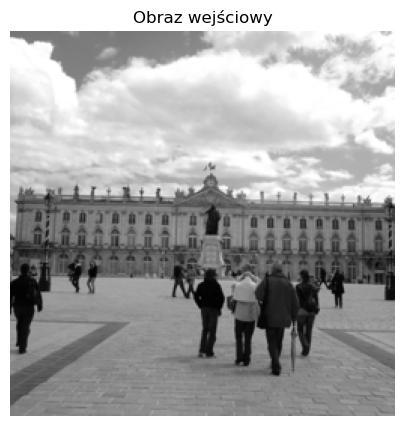

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Wczytanie obrazu ---
img = cv2.imread("4s.png", cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("❌ Błąd: obraz '4s.png' nie został znaleziony!")

plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.title("Obraz wejściowy")
plt.axis("off")
plt.show()


## 2.2. Obliczenie odchylenia standardowego
   
Odchylenie standardowe informuje o zmienności jasności pikseli.

In [6]:
std_value = np.std(img)
print("📌 Odchylenie standardowe:", std_value)


📌 Odchylenie standardowe: 62.53054011133662


## 2.3. Korelacja pikseli

Pokazuje podobieństwo struktury obrazu.

#### 2.3.1 Korelacja Pearsona między obrazem a jego przesunięciem

Pokazuje podobieństwo struktury obrazu.

In [7]:
# przesunięcie o 1 piksel w prawo
shifted = np.roll(img, 1, axis=1)

# korelacja Pearsona
corr_matrix = np.corrcoef(img.flatten(), shifted.flatten())
corr_value = corr_matrix[0, 1]

print("📌 Korelacja Pearsona (przesunięcie 1 px w prawo):", corr_value)


📌 Korelacja Pearsona (przesunięcie 1 px w prawo): 0.9718565616208089


## 2.4 Korelacja 2D (cross-correlation)

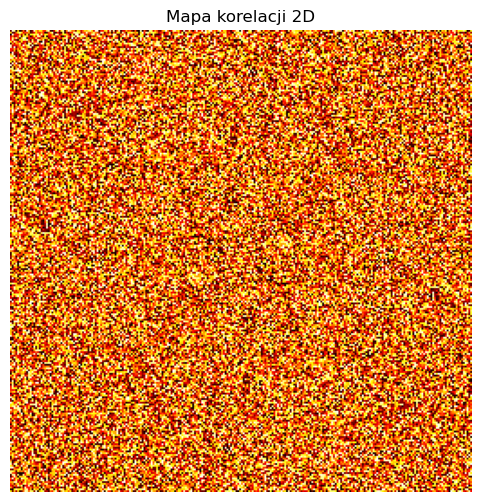

In [8]:
from scipy.signal import correlate2d

corr_2d = correlate2d(img, img, mode='same')

plt.figure(figsize=(6,6))
plt.imshow(corr_2d, cmap='hot')
plt.title("Mapa korelacji 2D")
plt.axis("off")
plt.show()


## 2.5. Energia obrazu

Energia jest definiowana jako:

$$
E = \sum_{x=1}^{M} \sum_{y=1}^{N} I(x, y)^2
$$


In [13]:
energy = np.sum(img.astype(np.float64)**2)
print("📌 Energia obrazu:", energy)


📌 Energia obrazu: 1851425451.0


In [18]:
print("\n==== PODSUMOWANIE ====")
print(f"Odchylenie standardowe: {std_value:.4f}")
print(f"Korelacja Pearsona (1 px): {corr_value:.4f}")
print(f"Energia: {energy:.2f}")



==== PODSUMOWANIE ====
Odchylenie standardowe: 62.5305
Korelacja Pearsona (1 px): 0.9719
Energia: 1851425451.00


## 3. Eksperyment: wpływ rozmycia na odchylenie, korelację i energię (wpływ filtracji)


==== EKSPERYMENT: rozmycie Gaussa ====
Odchylenie std po filtracji: 58.1452
Korelacja z obrazem oryginalnym: 0.9600
Energia po filtracji: 1816461376.00


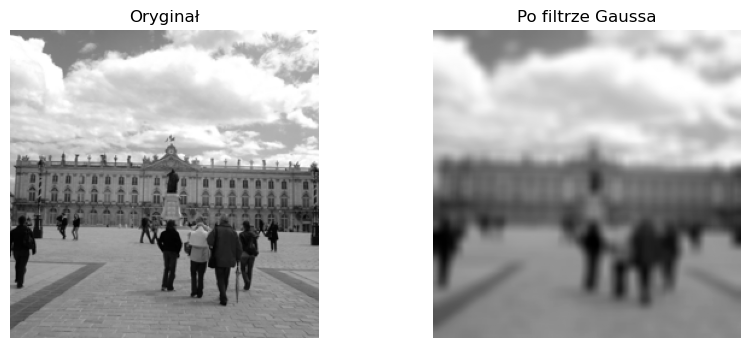

In [9]:
# Filtr Gaussa
blur = cv2.GaussianBlur(img, (11,11), 5)

std_blur = np.std(blur)
energy_blur = np.sum(blur.astype(np.float64)**2)

corr_blur = np.corrcoef(img.flatten(), blur.flatten())[0,1]

print("\n==== EKSPERYMENT: rozmycie Gaussa ====")
print(f"Odchylenie std po filtracji: {std_blur:.4f}")
print(f"Korelacja z obrazem oryginalnym: {corr_blur:.4f}")
print(f"Energia po filtracji: {energy_blur:.2f}")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Oryginał")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(blur, cmap='gray')
plt.title("Po filtrze Gaussa")
plt.axis("off")

plt.show()


## 4. Podsumowanie wyników

#### 4.1. Tabela porównawcza wyników

| Klasa | Odchylenie standardowe | Korelacja | Energia | Wnioski |
|-------|--------------------------|-----------|---------|----------|
| Klasa 1 |                          |           |         |          |
| Klasa 2 |                          |           |         |          |
| Klasa 3 |                          |           |         |          |
| Klasa 4 |                          |           |         |          |


### 5. Interpretacja wyników
   
#### 5.1. Odchylenie standardowe (STD)

wysokie → duża zmienność jasności, dużo szczegółów, tekstur
niskie → obraz gładki, mało detali

Rozmycie Gaussowskie obniża odchylenie standardowe.

#### 5.2 Korelacja

korelacja bliska 1 → obrazy podobne
korelacja niska → obrazy znacząco różne
Obraz po rozmyciu jest nadal podobny strukturalnie, ale mniej szczegółowy → korelacja spada.

#### 5.3 Energia

wysoka energia → intensywne zmiany pikseli, dużo szczegółów
niska energia → obraz wygładzony
Energia spada po rozmyciu.

### 6. Pytania kontrolne

1. Co opisuje odchylenie standardowe obrazu?
2. Dlaczego rozmycie zmniejsza energię obrazu?
3. Kiedy korelacja między obrazami będzie równa 1?
4. Czy obraz zaszumiony ma wyższe czy niższe odchylenie standardowe?
5. Jak interpretować wysoką energię obrazu?
6. Jak można zmienić korelację obrazów?
7. Dlaczego korelacja 2D ma maksimum w środku?
8. Co oznacza niska korelacja Pearsona dla dwóch obrazów?